## Tugas 2


In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      NaN           72.0           35.0      0.0   NaN   
1            1.0     85.0           66.0           29.0      0.0   NaN   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0      NaN  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0            NaN           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627   NaN        1  
1                

### Soal 1. Imputasi missing value dengan mean, median, dan modus

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('diabetes.csv')
print("Jumlah missing values sebelum imputasi:")
print(df.isnull().sum())

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

df['Glucose'] = mean_imputer.fit_transform(df[['Glucose']])
df['BloodPressure'] = mean_imputer.fit_transform(df[['BloodPressure']])
df['SkinThickness'] = median_imputer.fit_transform(df[['SkinThickness']])
df['Insulin'] = median_imputer.fit_transform(df[['Insulin']])
df['BMI'] = mode_imputer.fit_transform(df[['BMI']])

print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum())
print("\nData setelah imputasi missing values:")
print(df.head())


Jumlah missing values sebelum imputasi:
Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

Jumlah missing values setelah imputasi:
Pregnancies                  77
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

Data setelah imputasi missing values:
   Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0  120.462481           72.0           35.0      0.0  31.2   
1          1.0   85.000000           66.0           29.0      0.0  31.2   
2          8.0  183.000000           64.0            

### Soal 2. Cek korelasi antar variabel dengan heatmap


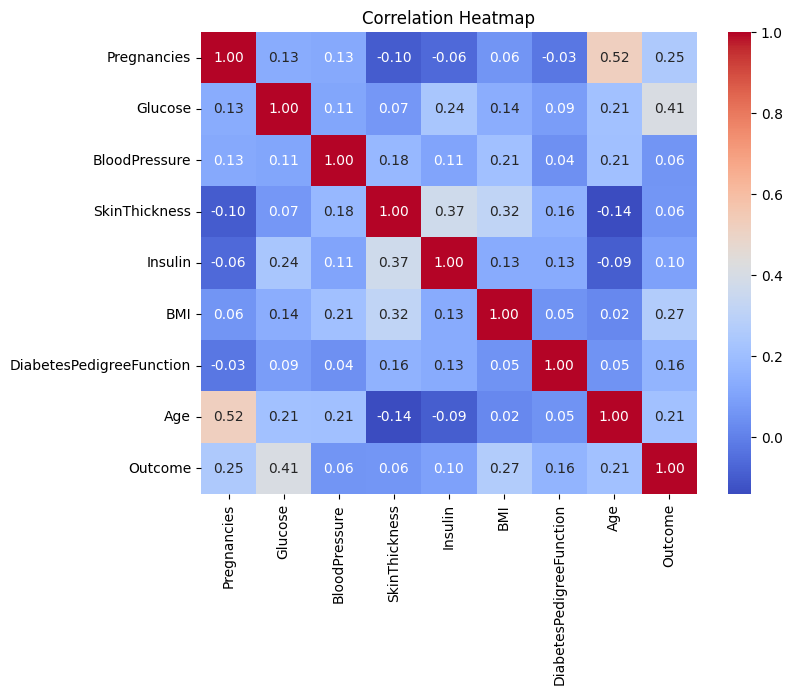

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Korelasi antar variabel dengan heatmap

# Menghitung korelasi antar variabel
correlation_matrix = df.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(8, 6))  # Menentukan ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Soal 3. Lakukan imbalance handling dengan undersampling

In [6]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Asumsi df adalah dataframe yang sudah selesai dilakukan imputasi dan preprocessing sebelumnya

# Memisahkan fitur dan label
X = df.drop('Outcome', axis=1)  # Fitur (semua kolom kecuali 'Outcome')
y = df['Outcome']  # Target (kolom 'Outcome')

# 3. Handling imbalance dengan undersampling

# Membuat objek RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Melakukan undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Mengonversi hasil resampling ke dalam DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Outcome'] = y_resampled

# Mengecek distribusi kelas setelah undersampling
print("Distribusi kelas setelah undersampling:")
print(df_resampled['Outcome'].value_counts())

# Menampilkan 5 baris pertama dari data yang sudah diundersample
print("\nData setelah undersampling:")
print(df_resampled.head())


Distribusi kelas setelah undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64

Data setelah undersampling:
     Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
556          1.0   97.000000           70.0           40.0     36.0  31.2   
117          5.0  120.462481           48.0            0.0      0.0  33.7   
572          3.0  111.000000           58.0           31.0     44.0  29.5   
251          2.0  129.000000           84.0            0.0      0.0  28.0   
161          7.0  102.000000           74.0           40.0     36.0  37.2   

     DiabetesPedigreeFunction   Age  Outcome  
556                     0.218  30.0        0  
117                     0.654  25.0        0  
572                     0.430  22.0        0  
251                     0.284  27.0        0  
161                     0.204   NaN        0  


### Soal 4. Lakukan scaling dengan robust scaler dan minmax

In [7]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd

# Asumsi df_resampled adalah dataset yang sudah di-preprocess dan di-handle imbalance-nya (dari langkah sebelumnya)

# Memisahkan fitur dan target (Outcome)
X = df_resampled.drop('Outcome', axis=1)  # Fitur
y = df_resampled['Outcome']  # Target

# 4. Scaling dengan RobustScaler dan MinMaxScaler

# Scaling dengan RobustScaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

# Scaling dengan MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Mengonversi hasil scaling ke DataFrame untuk kemudahan visualisasi
df_robust_scaled = pd.DataFrame(X_robust_scaled, columns=X.columns)
df_minmax_scaled = pd.DataFrame(X_minmax_scaled, columns=X.columns)

# Menambahkan kembali kolom 'Outcome' ke DataFrame yang sudah di-scale
df_robust_scaled['Outcome'] = y.values
df_minmax_scaled['Outcome'] = y.values

# Menampilkan 5 baris pertama dari data yang sudah di-scaling
print("\nData setelah scaling dengan RobustScaler:")
print(df_robust_scaled.head())

print("\nData setelah scaling dengan MinMaxScaler:")
print(df_minmax_scaled.head())



Data setelah scaling dengan RobustScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         -0.4 -0.710984       0.086726        0.53125  0.000000  0.000000   
1          0.4  0.000000      -1.746607       -0.71875 -0.377953  0.609756   
2          0.0 -0.286742      -0.913274        0.25000  0.083990 -0.414634   
3         -0.2  0.258713       1.253393       -0.71875 -0.377953 -0.780488   
4          0.8 -0.559469       0.420060        0.53125  0.000000  1.463415   

   DiabetesPedigreeFunction     Age  Outcome  
0                 -0.391252 -0.0625        0  
1                  0.668287 -0.3750        0  
2                  0.123937 -0.5625        0  
3                 -0.230863 -0.2500        0  
4                 -0.425273     NaN        0  

Data setelah scaling dengan MinMaxScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.066298  0.464978   
1     0